In [30]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import cvxpy as cp

In [31]:
h = 1.0
g = 0.1
m = 10.0
Fmax = 10.0
p0 = np.array([50, 50, 100])
v0 = np.array([-10, 0, -10])
alpha = 0.5
gamma = 1.0
K = 35
e3 = np.zeros(3)
e3[2] = 1

In [32]:
f = cp.Variable((3, K))
p = cp.Variable((3, K+1))
v = cp.Variable((3, K+1))

J_input = gamma*cp.sum([cp.norm(f[:, k], 2) for k in range(K)])

constrs = [v[:, k+1] == v[:, k] + (h/m)*f[:, k] - h*g*e3 for k in range(K)]
constrs += [p[:, k+1] == p[:, k] + (h/2)*(v[:, k] + v[:, k+1]) for k in range(K)]
constrs += [alpha* cp.norm(p[0:2, k], 2) <= p[2, k] for k in range(1, K+1)]
constrs += [cp.norm(f[:, k], 2) <= Fmax for k in range(K)]
constrs += [v[:, 0] == v0, p[:, 0] == p0,
            v[:, K] == 0, p[:, K] == 0]

prob = cp.Problem(cp.Minimize(J_input), constrs)
prob.solve()

/Users/q3/opt/anaconda3/envs/boyd_linear-algebra/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


192.991225385388

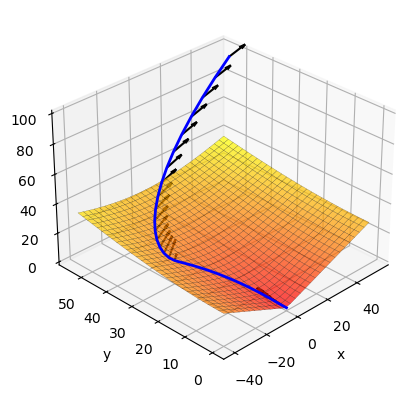

In [33]:
# use the following code to plot your trajectories
# and the glide cone (don't modify)
# -------------------------------------------------------
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
X = np.linspace(-40, 55, num=30)
Y = np.linspace(0, 55, num=30)
X, Y = np.meshgrid(X, Y)
Z = alpha*np.sqrt(X**2+Y**2)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.autumn, linewidth=0.1, alpha = 0.7, edgecolors="k")
ax = plt.gca();
ax.view_init(azim=225)
#Have your solution be stored in p
ax.plot(xs=p.value[0,:],ys=p.value[1,:],zs=p.value[2,:], c='b', lw=2, zorder = 5)
ax.quiver(p.value[0,:-1],p.value[1,:-1],p.value[2,:-1],
         f.value[0,:], f.value[1,:], f.value[2,:], zorder=5, color="black")

ax.set_xlabel("x"); ax.set_ylabel("y"); ax.set_zlabel("z")
plt.savefig('rocket_min_fuel.pdf', bbox_inches='tight')
plt.show()

# Mininum Landing Time

In [34]:
# Implement a linear search
proposed_K = K
feasible = True
f_final = cp.Variable((3, proposed_K))
p_final = cp.Variable((3, proposed_K+1))
v_final = cp.Variable((3, proposed_K+1))

while(feasible):
    f = cp.Variable((3, proposed_K))
    p = cp.Variable((3, proposed_K+1))
    v = cp.Variable((3, proposed_K+1))

    constrs = [v[:, k+1] == v[:, k] + (h/m)*f[:, k] - h*g*e3 for k in range(proposed_K)]
    constrs += [p[:, k+1] == p[:, k] + (h/2)*(v[:, k] + v[:, k+1]) for k in range(proposed_K)]
    constrs += [alpha* cp.norm(p[0:2, k], 2) <= p[2, k] for k in range(1, proposed_K+1)]
    constrs += [cp.norm(f[:, k], 2) <= Fmax for k in range(proposed_K)]
    constrs += [v[:, 0] == v0, p[:, 0] == p0,
                v[:, proposed_K] == 0, p[:, proposed_K] == 0]

    prob = cp.Problem(cp.Minimize(0), constrs)
    prob.solve()
    if (prob.status == 'infeasible'):
        feasible=False
        proposed_K += 1
    else:
        proposed_K -= 1
        f_final = f
        p_final = p
        v_final = v

/Users/q3/opt/anaconda3/envs/boyd_linear-algebra/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


In [35]:
proposed_K

25

In [36]:
f = f_final
p = p_final
v = v_final

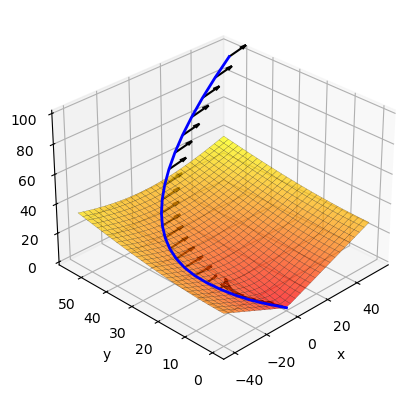

In [37]:
# use the following code to plot your trajectories
# and the glide cone (don't modify)
# -------------------------------------------------------
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
X = np.linspace(-40, 55, num=30)
Y = np.linspace(0, 55, num=30)
X, Y = np.meshgrid(X, Y)
Z = alpha*np.sqrt(X**2+Y**2)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.autumn, linewidth=0.1, alpha = 0.7, edgecolors="k")
ax = plt.gca();
ax.view_init(azim=225)
#Have your solution be stored in p
ax.plot(xs=p.value[0,:],ys=p.value[1,:],zs=p.value[2,:], c='b', lw=2, zorder = 5)
ax.quiver(p.value[0,:-1],p.value[1,:-1],p.value[2,:-1],
         f.value[0,:], f.value[1,:], f.value[2,:], zorder=5, color="black")

ax.set_xlabel("x"); ax.set_ylabel("y"); ax.set_zlabel("z")
plt.savefig('rocket_min_descent.pdf', bbox_inches='tight')
plt.show()